<a href="https://colab.research.google.com/github/heejae-yoon/Fraud-Detection-in-Card-Transactions/blob/main/transactions_DQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# read csv file
d1 = pd.read_csv('card transactions.csv')

In [ ]:
d1.shape

(97852, 10)

In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB


In [ ]:
d1.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,97852.00,97852.00,93149.00,97852.00,97852.00
mean,48926.50,5142201749.89,44684.19,425.47,0.02
std,28247.58,55560.79,28371.72,9949.85,0.14
min,1.00,5142110002.00,1.00,0.01,0.00
25%,24463.75,5142152067.00,20855.00,33.38,0.00
50%,48926.50,5142195612.00,38118.00,137.40,0.00
75%,73389.25,5142245485.00,63103.00,425.82,0.00
max,97852.00,5142847398.00,99999.00,3102045.53,1.00


In [ ]:
d1.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.00,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.00,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.00,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.00,P,3.62,0


In [ ]:
dict_value_counts = {}
for i in d1.columns.to_list():
    dict_value_counts[i]=d1[i].value_counts()

In [ ]:
dict_value_counts

{'Recnum': Recnum
 1        1
 65232    1
 65241    1
 65240    1
 65239    1
         ..
 32616    1
 32615    1
 32614    1
 32613    1
 97852    1
 Name: count, Length: 97852, dtype: int64,
 'Cardnum': Cardnum
 5142148452    1192
 5142184598     921
 5142189108     701
 5142223373     612
 5142297710     583
               ... 
 5142229531       1
 5142255321       1
 5142309697       1
 5142296479       1
 5142233066       1
 Name: count, Length: 1645, dtype: int64,
 'Date': Date
 2/28/10     684
 8/10/10     610
 3/15/10     594
 9/13/10     594
 8/9/10      536
            ... 
 11/7/10      11
 10/3/10      10
 1/16/10       9
 10/17/10      6
 12/26/10      6
 Name: count, Length: 365, dtype: int64,
 'Merchnum': Merchnum
 930090121224     9419
 5509006296254    2150
 9900020006406    1733
 602608969534     1108
 4353000719908    1029
                  ... 
 8995567800009       1
 534514              1
 7534960005993       1
 5384003050007       1
 3500000006160       1
 Name: c

<Axes: >

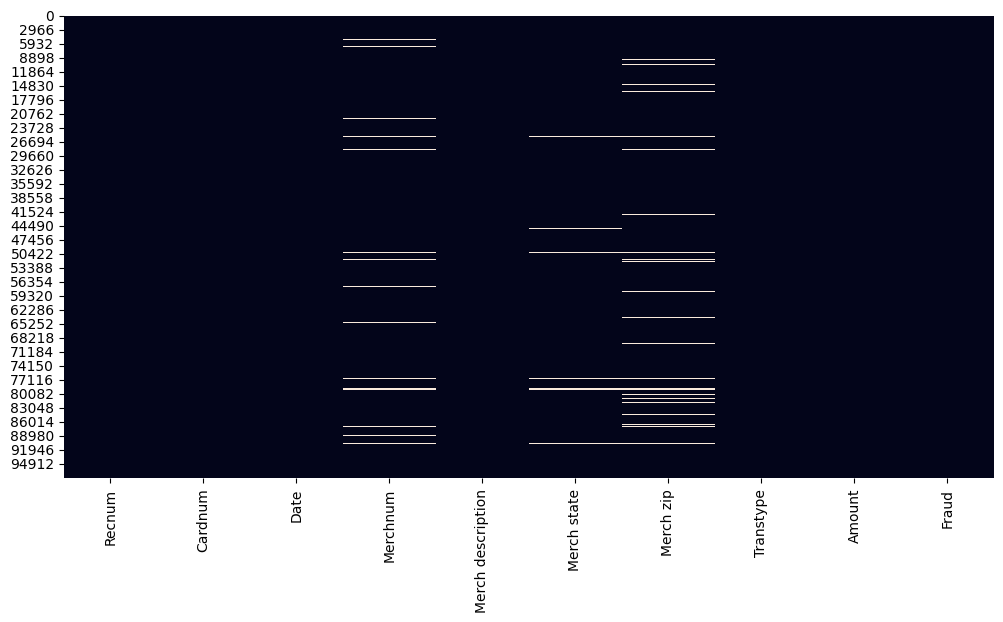

In [ ]:
sns.heatmap(d1.isnull(),cbar=False)

In [ ]:
dict_unique = {}
for i in d1.columns.to_list():
    dict_unique[i]=len(d1[i].unique())

In [ ]:
dict_unique

{'Recnum': 97852,
 'Cardnum': 1645,
 'Date': 365,
 'Merchnum': 13092,
 'Merch description': 13126,
 'Merch state': 228,
 'Merch zip': 4568,
 'Transtype': 4,
 'Amount': 35331,
 'Fraud': 2}

In [ ]:
dict_populated = {}
for i in d1.columns.to_list():
    dict_populated[i] = d1[i].count()/len(d1)*100

In [ ]:
dict_populated

{'Recnum': 100.0,
 'Cardnum': 100.0,
 'Date': 100.0,
 'Merchnum': 96.528430691248,
 'Merch description': 100.0,
 'Merch state': 98.77059232310019,
 'Merch zip': 95.19376200793035,
 'Transtype': 100.0,
 'Amount': 100.0,
 'Fraud': 100.0}

In [ ]:
d1[d1['Amount'] == 0]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud


In [ ]:
d1.tail()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97847,97848,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.00,P,84.79,0
97848,97849,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.00,P,118.75,0
97849,97850,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.00,P,363.56,0
97850,97851,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.00,P,2202.03,0
97851,97852,5142243247,12/31/10,9108347680006,STAPLES NATIONAL #471,NJ,7606.00,P,554.64,0


In [ ]:
d2 = d1.drop(['Amount','Recnum'],axis=1)

In [ ]:
for i in d2.columns.to_list():
    d2[i]=d2[i].astype(str)

In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cardnum            97852 non-null  object
 1   Date               97852 non-null  object
 2   Merchnum           97852 non-null  object
 3   Merch description  97852 non-null  object
 4   Merch state        97852 non-null  object
 5   Merch zip          97852 non-null  object
 6   Transtype          97852 non-null  object
 7   Fraud              97852 non-null  object
dtypes: object(8)
memory usage: 6.0+ MB


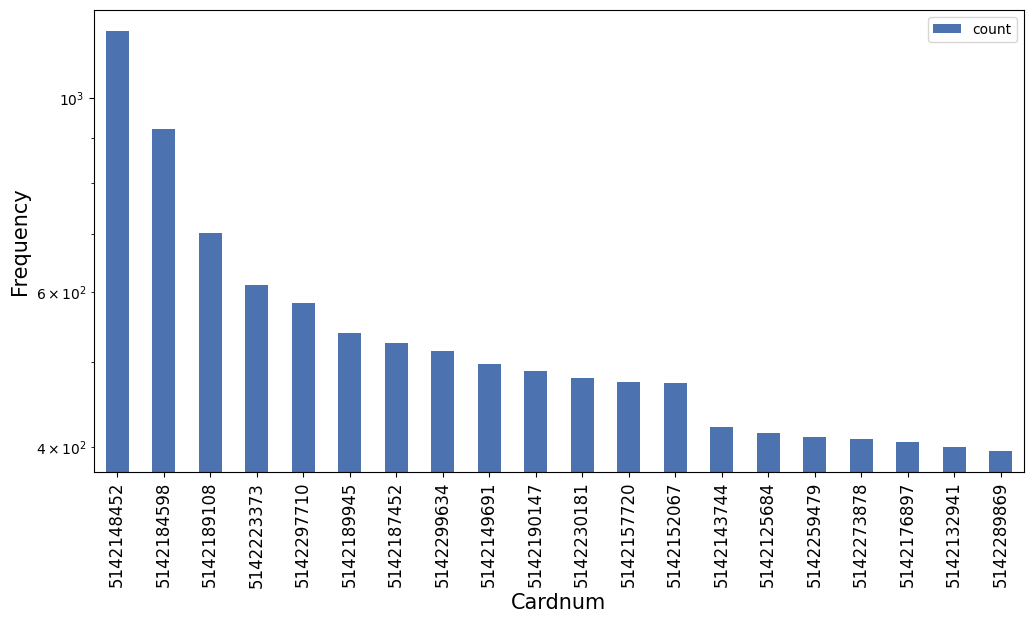

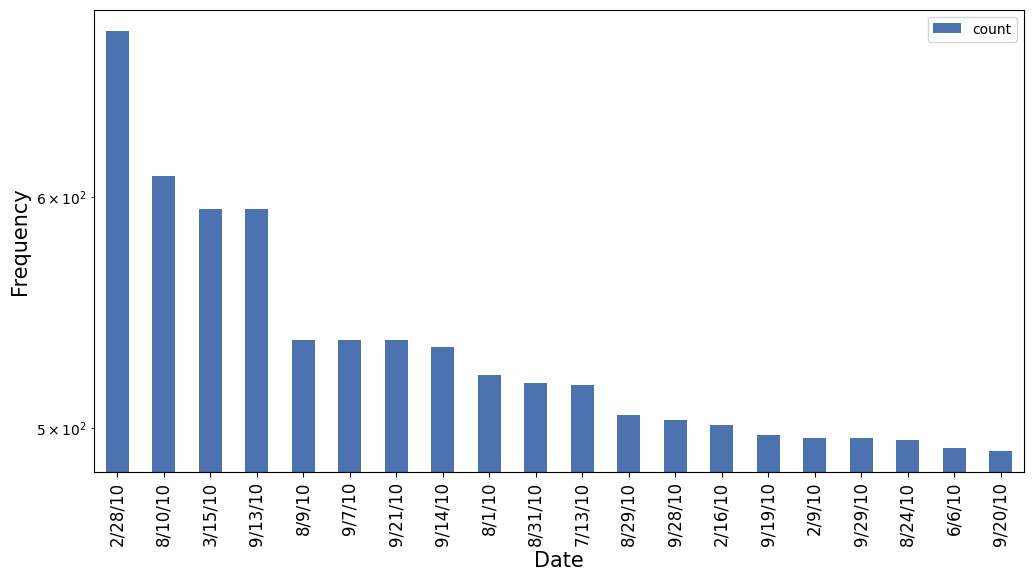

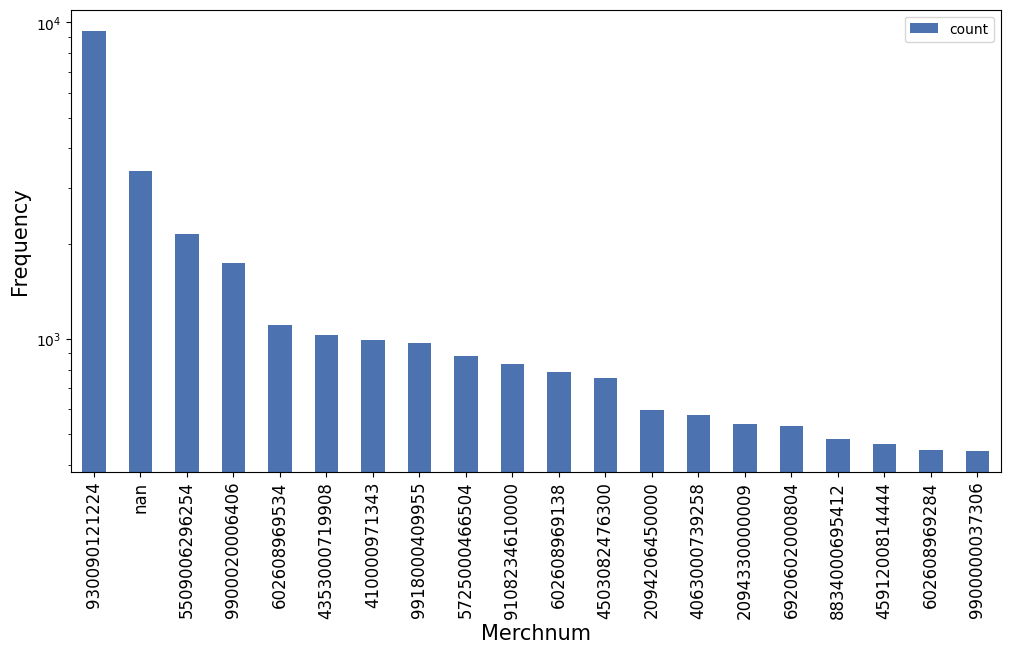

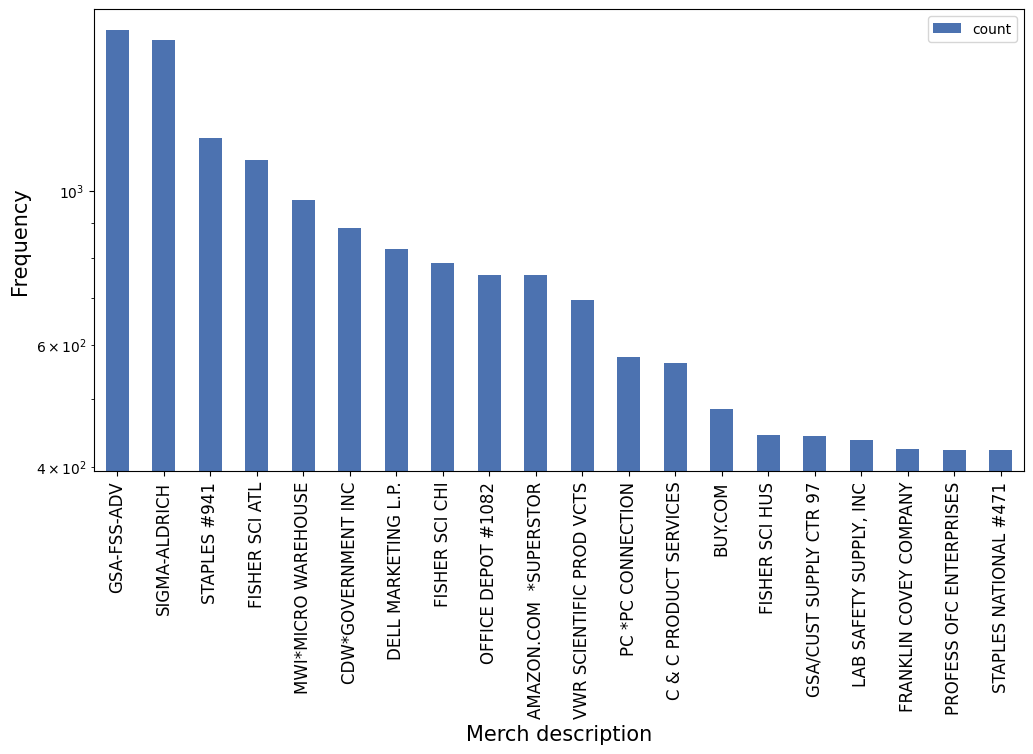

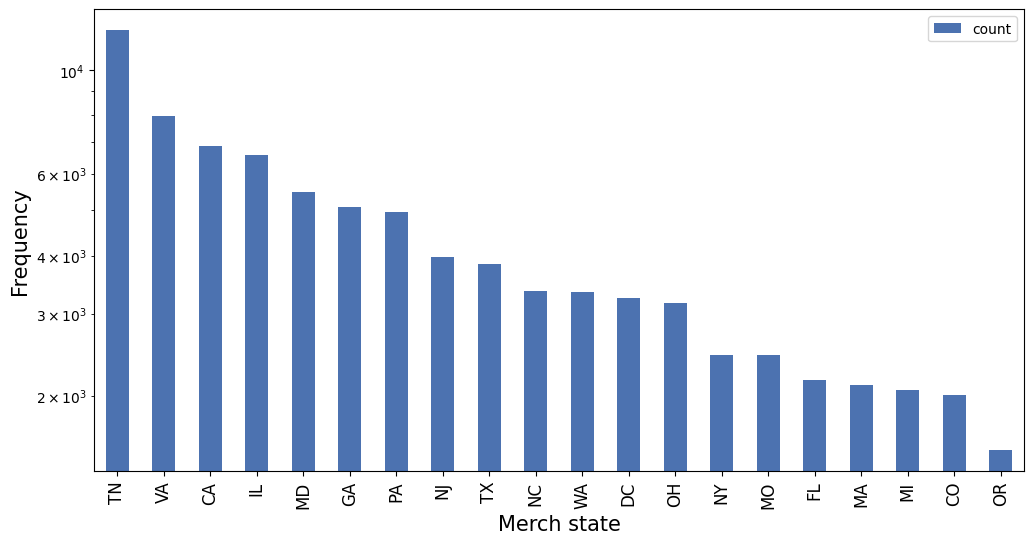

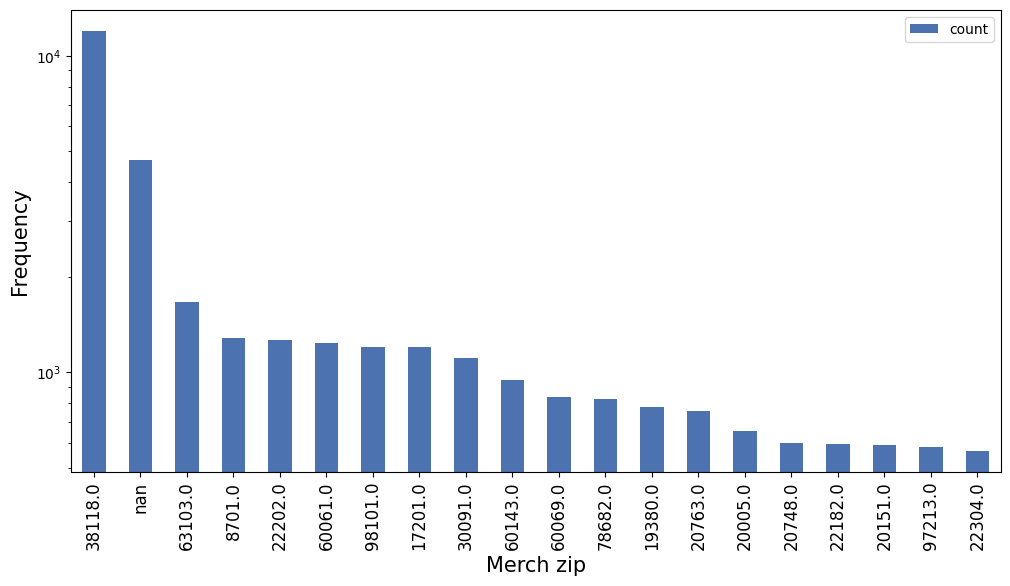

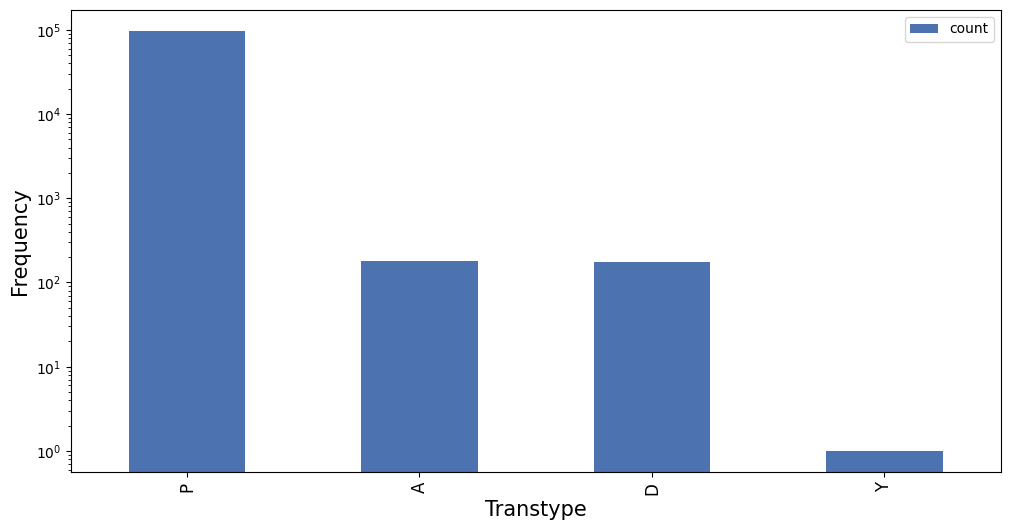

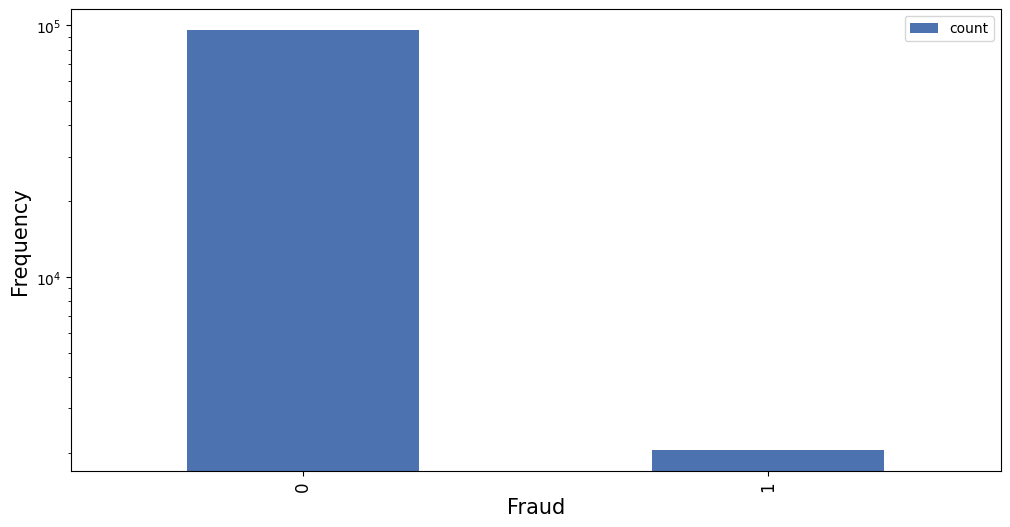

In [ ]:
categoricalVar=d2.columns.tolist()
for col in categoricalVar:
    df = pd.DataFrame(d2[col].value_counts().sort_values(ascending=False).head(20))
    df.plot(kind='bar',figsize=(12,6))
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yscale('log')

    for p in ax.patches:
        ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Center horizontally, top of the bar
                    ha='center', va='bottom',  # Center horizontally, place above the bar
                    fontsize=12, color='black')

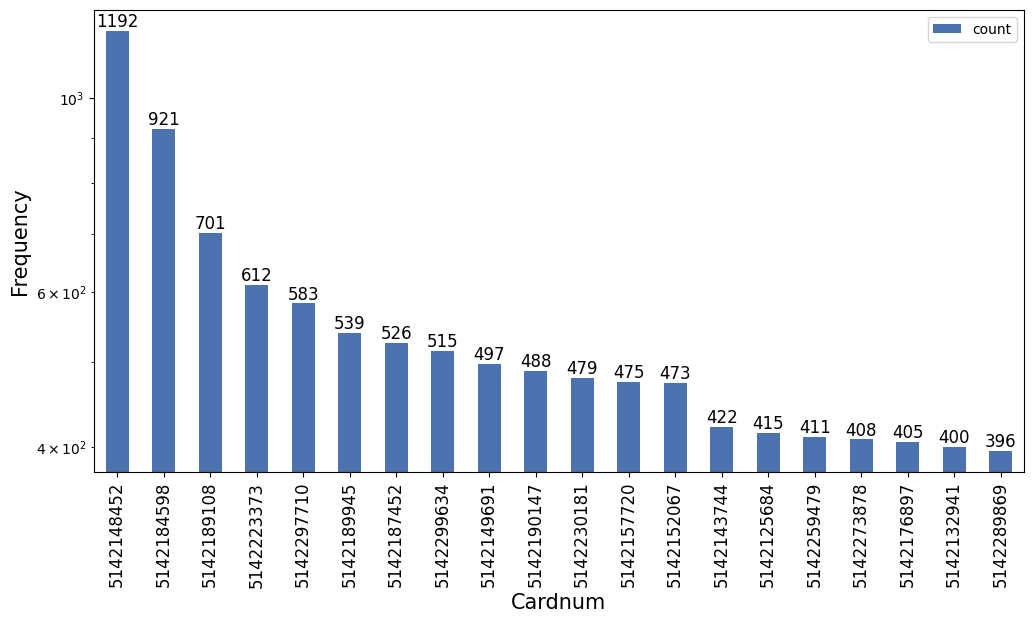

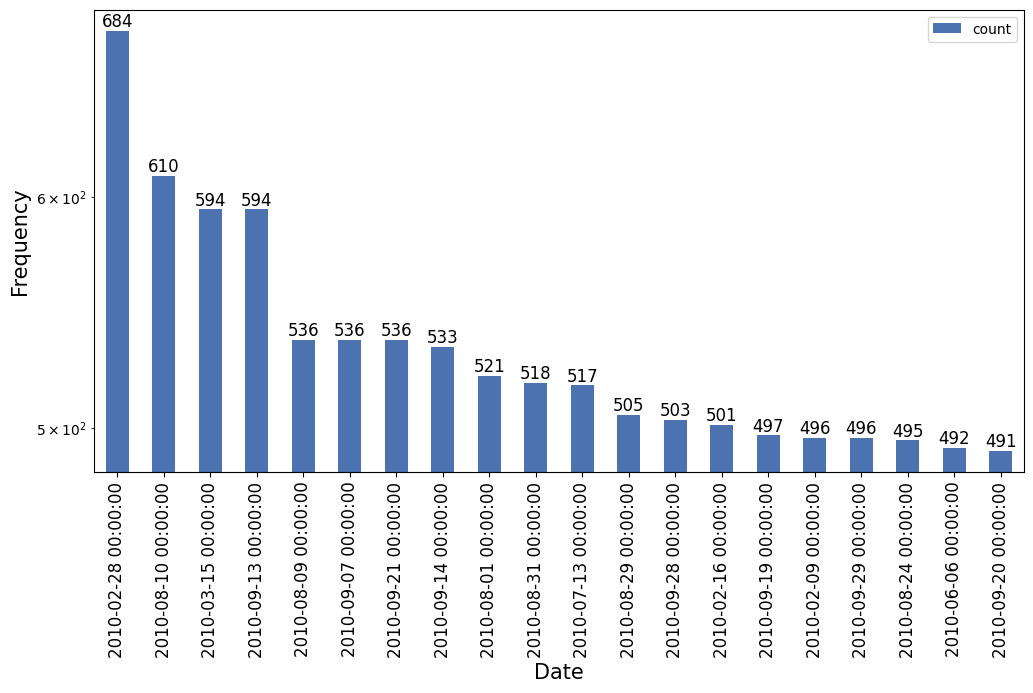

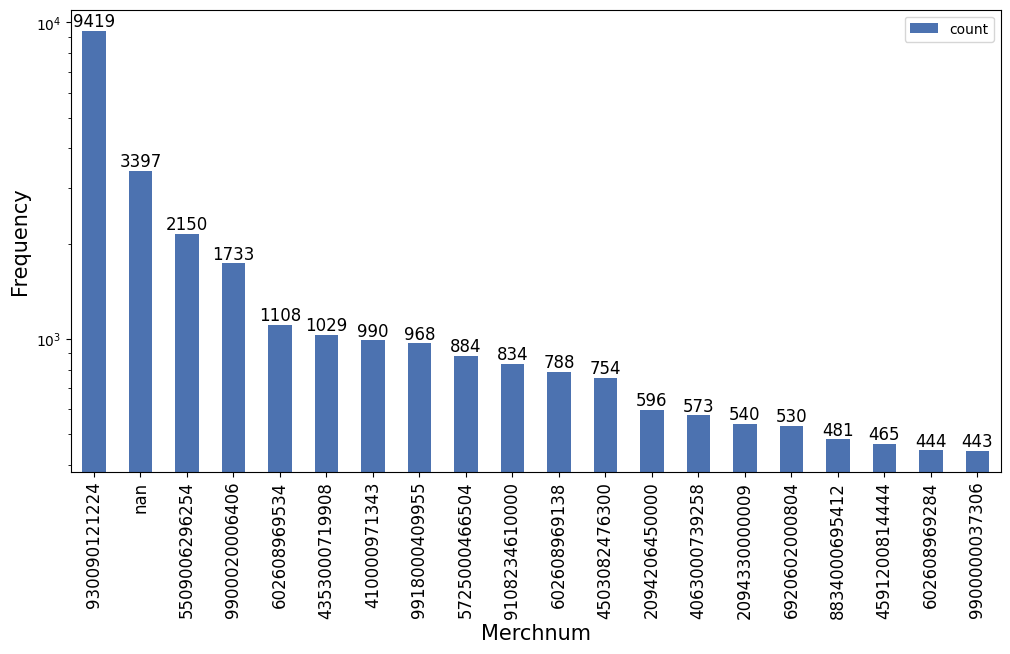

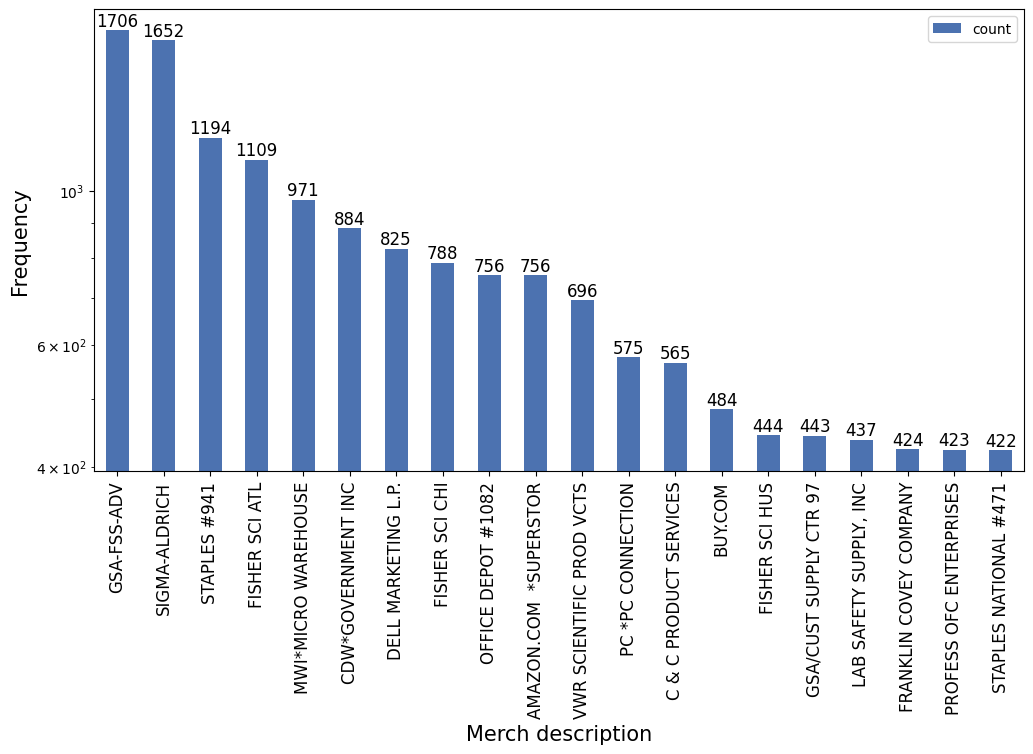

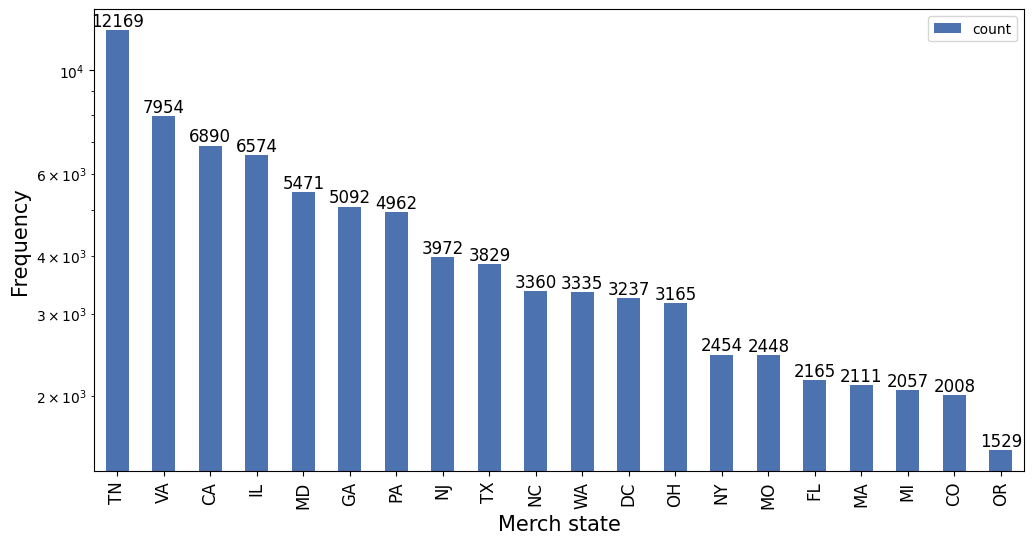

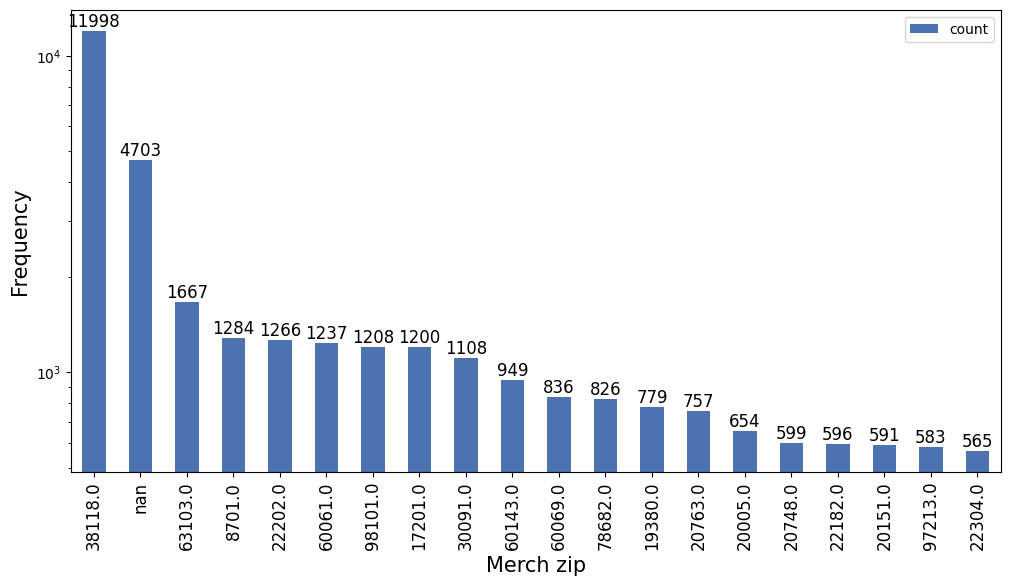

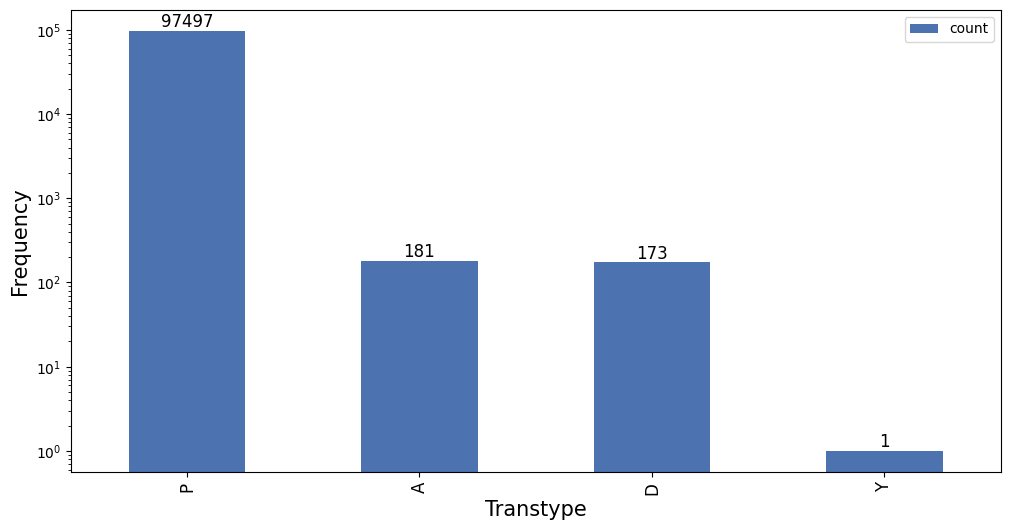

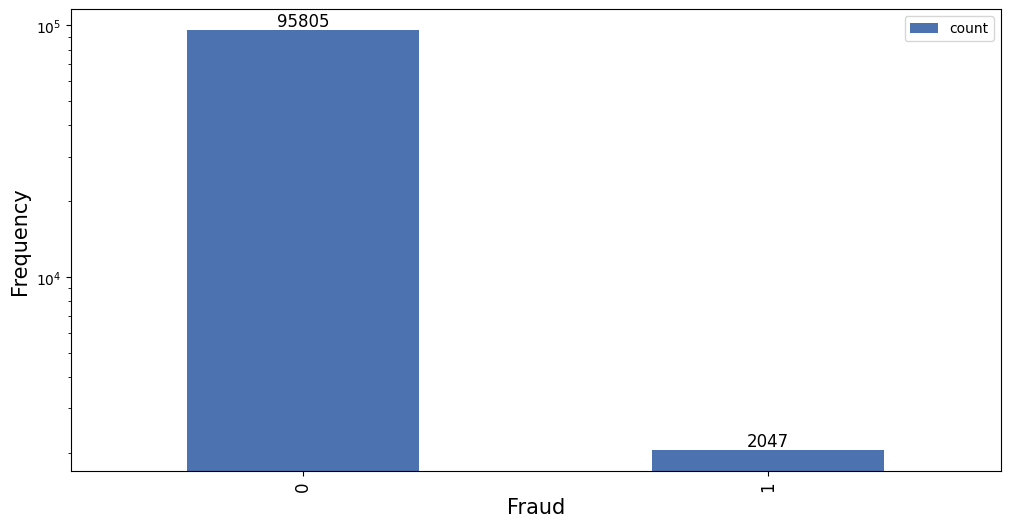

In [ ]:
categoricalVar = d2.columns.tolist()
for col in categoricalVar:
    df = pd.DataFrame(d2[col].value_counts().sort_values(ascending=False).head(20))
    ax = df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=12)

    # Keep the y-axis in log scale
    ax.set_yscale('log')

    # Adding values centered on top of the bars
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Center horizontally, top of the bar
                    ha='center', va='bottom',  # Center horizontally, place above the bar
                    fontsize=12, color='black')  # Adjust text appearance

    plt.show()


<ipython-input-85-d60590472d7a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(temp['Amount'],bins=25, kde=False, color='blue')


Text(0, 0.5, 'Count')

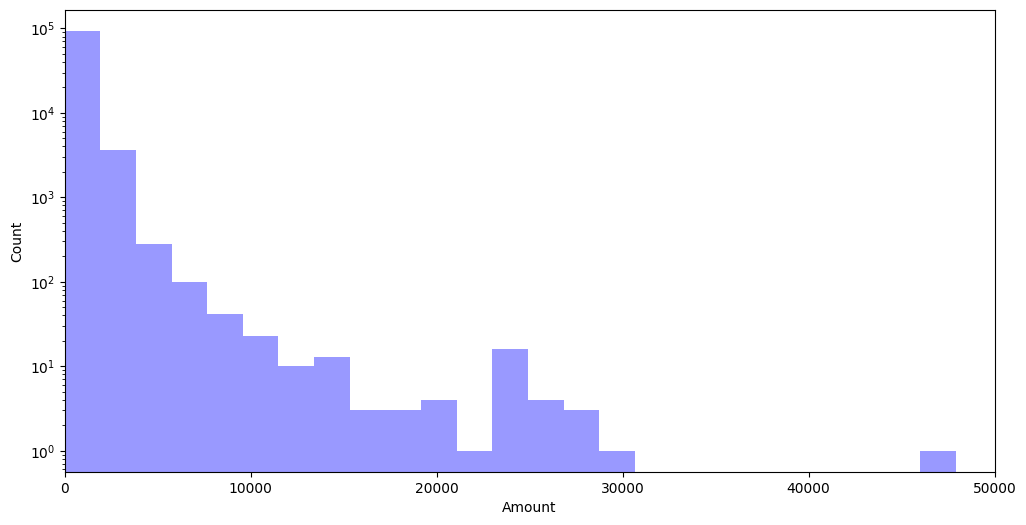

In [ ]:
plt.rcParams["figure.figsize"] = [12,6]
xhigh = 50000
plt.xlim(0,xhigh)
temp = d1[d1['Amount'] <= xhigh]
sns.set_palette("deep")
plot=sns.distplot(temp['Amount'],bins=25, kde=False, color='blue')
plot.set_yscale('log')
plt.ylabel('Count')

In [ ]:
dict_value_counts['Date'].to_csv('date.csv')

Text(0.5, 1.0, 'Distribution of Amounts')

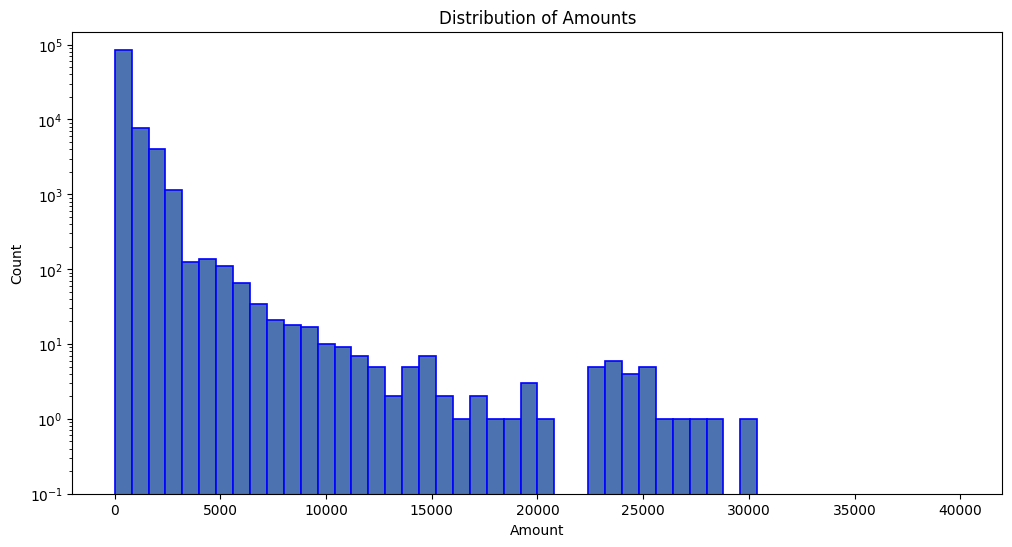

In [ ]:
plt.hist(d1['Amount'],bins=50,range=[0,40000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.ylabel('Count')
plt.xlabel('Amount')
plt.title('Distribution of Amounts')

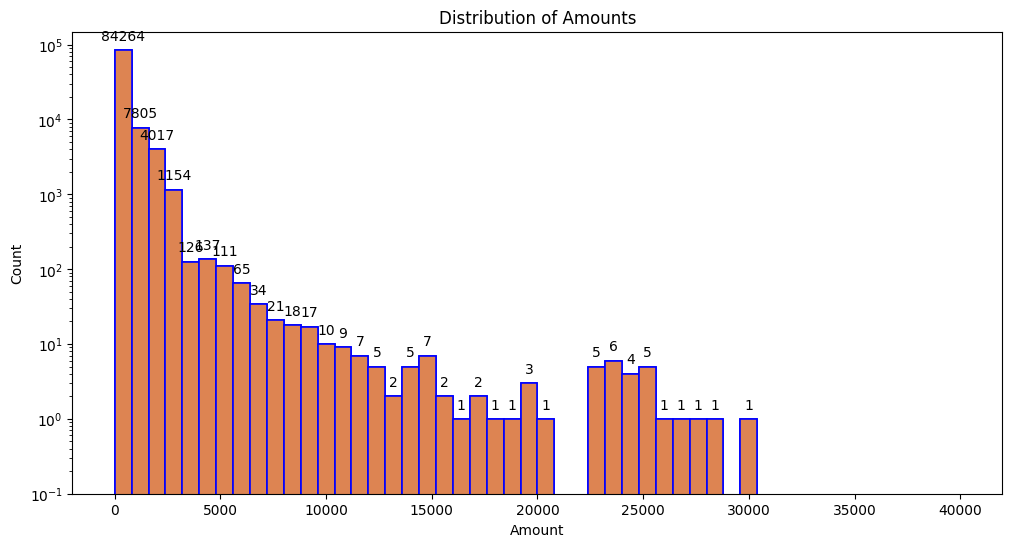

In [ ]:
# Plotting the histogram
plt.hist(d1['Amount'], bins=50, range=[0, 40000], edgecolor='blue', linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom=0.1)
plt.ylabel('Count')
plt.xlabel('Amount')
plt.title('Distribution of Amounts')

# Adding values on top of the bars
n, bins, patches = plt.hist(d1['Amount'], bins=50, range=[0, 40000], edgecolor='blue', linewidth=1.2)
for patch, count in zip(patches, n):
    plt.annotate(f'{int(count)}',
                 xy=(patch.get_x() + patch.get_width() / 2, count),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

<ipython-input-89-08350b67c3a6>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d2['Date'] = pd.to_datetime(d2['Date'])


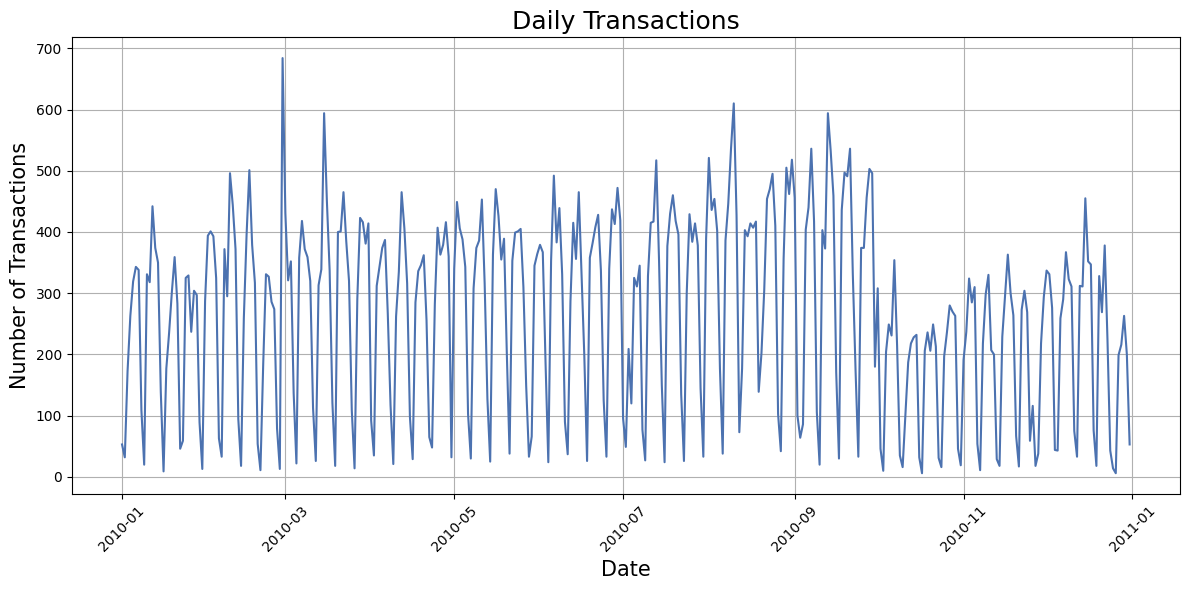

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data - assuming `d2` is your DataFrame with a 'Date' column
# Replace this with your actual dataset
# d2 = pd.read_csv('your_data.csv')  # If loading from a CSV

# Ensure the 'Date' column is in datetime format
d2['Date'] = pd.to_datetime(d2['Date'])

# Group by the date and count the number of transactions per day
daily_transactions = d2.groupby(d2['Date'].dt.date).size()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values, linestyle='-')

# Customize the plot
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Transactions', fontsize=15)
plt.title('Daily Transactions', fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for easier visualization

# Show the plot
plt.tight_layout()
plt.show()
